### Pacotes

In [2]:
import pandas as pd #pacote para manipulação de dados
import matplotlib.pyplot as plt # pacote para criar gráficos
import numpy as np
import sklearn.model_selection as ms
import sklearn.linear_model as lm

import statsmodels.formula.api as smf

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8) # define o tamanho padrão dos gráficos criados

### Dataset

In [3]:
path = r"D:\UFPR\2º Semestre 2021\Estatística Econômica e Introdução à Econometria\1. Relatório Enade\2018\3.DADOS\microdados_enade_2018.txt"
enade = pd.read_table(path, sep=';', decimal=',')

### Variáveis

In [4]:
enade_economia = enade[enade['CO_GRUPO'] == 13]
nota_idade = enade_economia.filter(['NU_IDADE','NT_GER']).dropna()

In [5]:
X = np.array(nota_idade['NU_IDADE']).reshape(-1,1)
y = np.array(nota_idade['NT_GER']).reshape(-1,1)

In [6]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=0)

### Modelo Linear

In [7]:
reglinear = lm.LinearRegression()
reglinear.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = reglinear.predict(X_test)

In [9]:
y_pred

array([[38.10783716],
       [40.42786466],
       [38.49450841],
       ...,
       [39.26785091],
       [32.30776841],
       [38.88117966]])

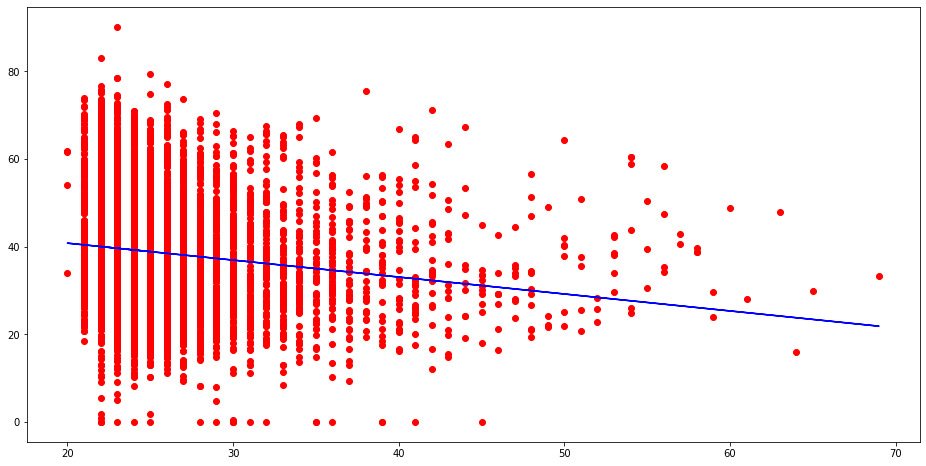

In [10]:
#treino
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, reglinear.predict(X_train), color='blue')

In [11]:
reglinear.predict([[20]])

array([[40.81453591]])

In [12]:
nota_idade_nozeros = nota_idade[nota_idade['NT_GER'] != 0]

# Modelo logaritmico kaggle

In [13]:
# Input dataset
X_log = np.log(nota_idade_nozeros['NU_IDADE'].values.reshape(-1,1))

# Output or Predicted Value of data
y_log = nota_idade_nozeros['NT_GER'].values.reshape(-1,1)


In [14]:
X_train_log, X_test_1og, Y_train_log, Y_test_log = ms.train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

In [15]:
y_pred_log= lm.LinearRegression()
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [16]:
print(" Intercept value of Model is " ,y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

 Intercept value of Model is  [80.40575347]
Co-efficient Value of Log Model is :  [[-12.85783907]]


In [17]:
l_model= y_pred_log.predict(X_test_1og)
l_model

array([[40.66162705],
       [40.66162705],
       [40.66162705],
       ...,
       [40.09007344],
       [40.09007344],
       [39.01796613]])

In [18]:
pmsh_pf_1 = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
pmsh_pf_1

,Actual,Predict
0,56.2,40.661627
1,42.6,40.661627
2,30.4,40.661627
3,56.5,40.090073
4,35.3,35.064377
...,...,...
1604,34.2,40.090073
1605,44.8,38.513673
1606,40.4,40.090073
1607,42.4,40.090073


# Teste T

O Teste T abaixo diz que os valores predititivados com o modelo log log quando comparado com os valores atuais possuem média semelhante. Portanto, o modelo é confiável para predizer os valores das notas.

In [19]:
from scipy import stats

t_value,p_value=stats.ttest_ind(pmsh_pf_1['Actual'],pmsh_pf_1['Predict'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05

if p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the 

effect of ammonium chloride and urea on grain yield of paddy are not equal i.e., μ1 = μ2 at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha, 'We do not reject the null hypothesis H0.')

Test statistic is -1.196523
p-value for two tailed test is 0.231581
Conclusion n Since p-value(=0.231581) > alpha(=0.05) We do not reject the null hypothesis H0.


# Modelo logaritmico-linear

In [20]:
# Input dataset
X_log = np.log(nota_idade_nozeros['NU_IDADE'].values.reshape(-1,1))

# Output or Predicted Value of data
y_lin = nota_idade_nozeros['NT_GER'].values.reshape(-1,1)


In [21]:
X_train_log, X_test_log, Y_train_lin, Y_test_lin = ms.train_test_split(X_log, y_lin, test_size=0.2, random_state= 42)

In [22]:
y_pred_log_lin= lm.LinearRegression()
y_pred_log_lin.fit(X_train_log,Y_train_lin)

LinearRegression()

In [23]:
print(" Intercept value of Model is " ,y_pred_log_lin.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log_lin.coef_)

 Intercept value of Model is  [80.40575347]
Co-efficient Value of Log Model is :  [[-12.85783907]]


In [24]:
l_model= y_pred_log_lin.predict(X_test_log)
l_model

array([[40.66162705],
       [40.66162705],
       [40.66162705],
       ...,
       [40.09007344],
       [40.09007344],
       [39.01796613]])

In [25]:
df_loglin_values = pd.DataFrame({'Actual':Y_test_lin.flatten(), 'Predict': l_model.flatten()})
df_loglin_values

,Actual,Predict
0,56.2,40.661627
1,42.6,40.661627
2,30.4,40.661627
3,56.5,40.090073
4,35.3,35.064377
...,...,...
1604,34.2,40.090073
1605,44.8,38.513673
1606,40.4,40.090073
1607,42.4,40.090073


# Teste T

O Teste T abaixo diz que os valores predititivados com o modelo log log quando comparado com os valores atuais possuem média semelhante. Portanto, o modelo é confiável para predizer os valores das notas.

In [26]:
t_value,p_value=stats.ttest_ind(df_loglin_values['Actual'],df_loglin_values['Predict'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05

if p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'We reject the null hypothesis H0. So we conclude that the, μ1 = μ2 at %.2f level of significance.'%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha, 'We do not reject the null hypothesis H0.')

Test statistic is -1.196523
p-value for two tailed test is 0.231581
Conclusion n Since p-value(=0.231581) > alpha(=0.05) We do not reject the null hypothesis H0.


# Modelo LIN-Logarithmic 

In [27]:
# Input dataset
X_lin = nota_idade_nozeros['NU_IDADE'].values.reshape(-1,1)

# Output or Predicted Value of data
y_log = np.log(nota_idade_nozeros['NT_GER'].values.reshape(-1,1))


In [28]:
X_train, X_test, Y_train_log, Y_test_log = ms.train_test_split(X_lin, y_log, test_size=0.2, random_state= 42)

In [29]:
y_pred_lin_log= lm.LinearRegression()
y_pred_lin_log.fit(X_train,Y_train_log)

LinearRegression()

In [30]:
print(" Intercept value of Model is " ,y_pred_lin_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_lin_log.coef_)

 Intercept value of Model is  [3.86058527]
Co-efficient Value of Log Model is :  [[-0.01027209]]


In [31]:
l_model= y_pred_lin_log.predict(X_test)
l_model

array([[3.63459937],
       [3.63459937],
       [3.63459937],
       ...,
       [3.62432729],
       [3.62432729],
       [3.60378312]])

In [32]:
df_linglog_values = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
df_linglog_values #provavemnete tem erro

,Actual,Predict
0,4.028917,3.634599
1,3.751854,3.634599
2,3.414443,3.634599
3,4.034241,3.624327
4,3.563883,3.511334
...,...,...
1604,3.532226,3.624327
1605,3.802208,3.593511
1606,3.698830,3.624327
1607,3.747148,3.624327


# Teste T

O Teste T abaixo diz que os valores predititivados com o modelo log log quando comparado com os valores atuais possuem média semelhante. Portanto, o modelo é confiável para predizer os valores das notas.

In [33]:
t_value,p_value=stats.ttest_ind(df_linglog_values['Actual'],df_loglin_values['Predict'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05

if p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'We reject the null hypothesis H0. So we conclude that the, μ1 = μ2 at %.2f level of significance.'%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha, 'We do not reject the null hypothesis H0.')

Test statistic is -614.242631
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the, μ1 = μ2 at 0.05 level of significance.


# Modelo Quadrático 

In [44]:
nota_idade['NT_GER_^2'] = nota_idade.apply(lambda row: row.NT_GER**2, axis =1 )
nota_idade


,NU_IDADE,NT_GER,NU_IDADE^2,NT_GER_^2
160,28,24.9,784.0,620.01
161,30,25.6,900.0,655.36
162,29,48.7,841.0,2371.69
163,22,35.7,484.0,1274.49
164,47,33.9,2209.0,1149.21
...,...,...,...,...
546659,27,40.9,729.0,1672.81
547633,41,32.2,1681.0,1036.84
547634,26,27.8,676.0,772.84
547635,30,30.2,900.0,912.04


In [45]:
X_q = nota_idade.iloc[:,nota_idade.columns != 'NT_GER']
Y_q = nota_idade.iloc[:,1]
X_train, X_test, Y_train, Y_test = ms.train_test_split(X_q, Y_q, test_size=0.2, random_state= 42)
print(Y_test)

52445     52.4
471479    34.6
471548    41.6
175200    43.6
178032    50.2
          ... 
152201    34.5
317588    31.6
305478    41.9
181736    28.4
519292    51.6
Name: NT_GER, Length: 1615, dtype: float64


In [46]:
model = lm.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [47]:
print(" Intercept value of Model is " ,model.intercept_)

coeff_df = pd.DataFrame(model.coef_,X_q.columns ,columns=['Coefficient'])
print(coeff_df)

 Intercept value of Model is  20.83806984312813
            Coefficient
NU_IDADE      -0.103453
NU_IDADE^2     0.001166
NT_GER_^2      0.011796


In [38]:
y_pred_q_q = model.predict(X_test)

In [39]:
df_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q_q})
df_qm.head()

,Actual,Predicted
52445,52.4,40.291751
471479,34.6,39.447496
471548,41.6,41.183135
175200,43.6,39.447496
178032,50.2,33.597043


# Teste T

O Teste T abaixo diz que os valores predititivados com o modelo log log quando comparado com os valores atuais possuem média semelhante. Portanto, o modelo é confiável para predizer os valores das notas.

In [40]:
t_value,p_value=stats.ttest_ind(df_qm['Actual'],df_qm['Predicted'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05

if p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'We reject the null hypothesis H0. So we conclude that the, μ1 = μ2 at %.2f level of significance.'%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha, 'We do not reject the null hypothesis H0.')

Test statistic is 0.167256
p-value for two tailed test is 0.867179
Conclusion n Since p-value(=0.867179) > alpha(=0.05) We do not reject the null hypothesis H0.
